# Purchasing Analytics

In this notebook, I will analyse the purchasing behavior of the customers.

The dataset we are going to use is a dataset of each transaction, rather than the customer from the last one.
The dataset consists of 500 individuals and their purchase of candy bars from the same store over a period of 2 years.

Here is the Legend:

![](Legend1.png)

![](Legend2.png)

We are going to look at:

1. Purchase probability - will a customer buy a product from a particular product category when they enter the shop?
2. Brand choice probability - Which brand will the pick?
3. Purchase quantity - How many units are they going to buy?

In [1]:
# Importing libraries

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Data import

df_purchase = pd.read_csv("purchase data.csv")

In [3]:
# Data exploration
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
# Any missing data?
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

### Data Segmentation

##### Import Segmentation Model

In [5]:
scaler = pickle.load(open(r'C:\Users\ml258\Python\365\Customer_analytics2\Segment_analytics\scaler.pickle', 'rb'))

pca = pickle.load(open(r'C:\Users\ml258\Python\365\Customer_analytics2\Segment_analytics\pca.pickle', 'rb'))

kmeans_pca = pickle.load(open(r'C:\Users\ml258\Python\365\Customer_analytics2\Segment_analytics\kmeans_pca.pickle', 'rb'))

In [6]:
# Standardization
# We standardize the purchase data in the same way we did the segmentation data, using the standard scaler.

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segmentation_std = scaler.transform(features)

In [7]:
# PCA
# We apply pca on the purchase data and obtain 3 principal components for each row in the table. 
df_purchase_segm_pca = pca.transform(df_purchase_segmentation_std)

### K-means PCA

In [8]:
# Based on the principal components, we use the predict method from pca to segment the purchase data into the four segments.
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [9]:
# Copy resulting data frame as a purchase predictors data frame. 
# We'll be changing the predictors data frame, by adding and changing columns.
# Therefore, we want to keep an original copy.
df_purchase_predictors = df_purchase.copy()

In [10]:
# Add segment information as a new column in our predictors data frame.
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

### Descriptive Analysis by Segments

#### Data Analysis by Customer

In [11]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [12]:
# Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [13]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


Now we got the data of how many times a customer has visited the shop and bought a candy bar!

Now, let's calculate the average purchase frequency per individual. That's the number of times a person has visited the store divided by total number of visits by that individual.

In [14]:
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [15]:
# Average number of purchases by customer ID
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [16]:
# Which segment a customer belongs to.

temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [17]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


### Segment Proportions

We can analyse the behavior of the 4 segments.
We can step on our table and group by segments.

In [18]:
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns={'N_Purchases':'Segment Proportions'})
segm_prop

,Segment Proportions
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


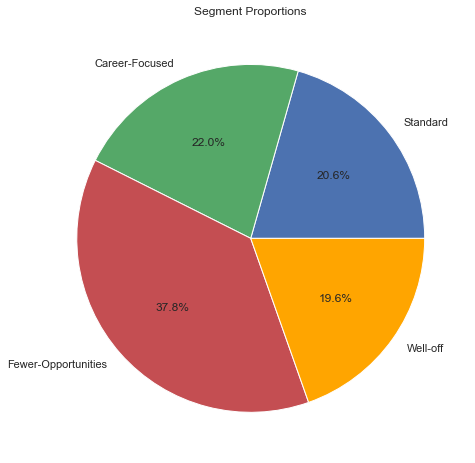

In [22]:
# Let's create a piechart of the segments proportions.

plt.figure(figsize=(10,8))
plt.pie(segm_prop['Segment Proportions'],
        labels=['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-off'],
        autopct="%1.1f%%",
        colors=('b', 'g', 'r', 'orange'))

plt.title("Segment Proportions")
plt.show()

### Purchase Occasion and Purchase Incidence

- How often do people from different segments visit the store?
- How often do they buy candy bars?
- How often do they buy relative the their number of their store visits?

To answer these questions, we'll calculate the mean and standard diviations.
The means shows the average behavior of each segment, while the std shows spread out the data it.

In [20]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,113.730159,22.756614,0.201588
3.0,117.295918,34.602041,0.284478


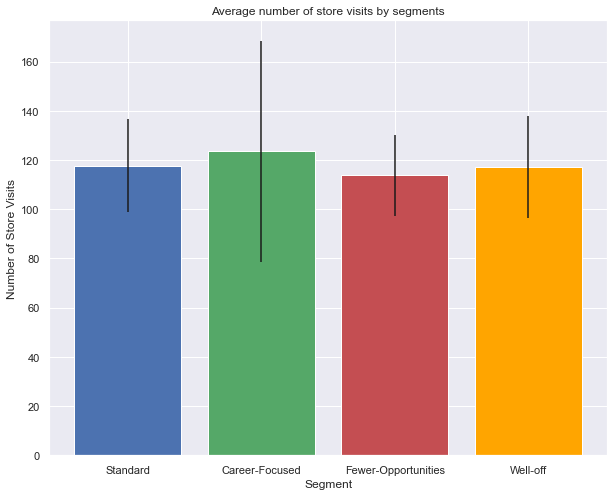

In [24]:
# How often do people from different segments visit the store?

segments_std = df_purchase_descr.groupby(['Segment']).std()

plt.figure(figsize=(10,8))
plt.bar(x = (0,1,2,3),
        tick_label = ('Standard', 'Career-Focused','Fewer-Opportunities', 'Well-off'),
        height=segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))

plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average number of store visits by segments')
plt.show()

The "Fewer-Opportunities" segment visits the store least often. The "Career-Focused" segment visits the store the most, but they also have the strongest spread of standard deviation. However, they are all very similar regarding visits to the store.

Now, we're going to take look at how often they purchase candy bars.

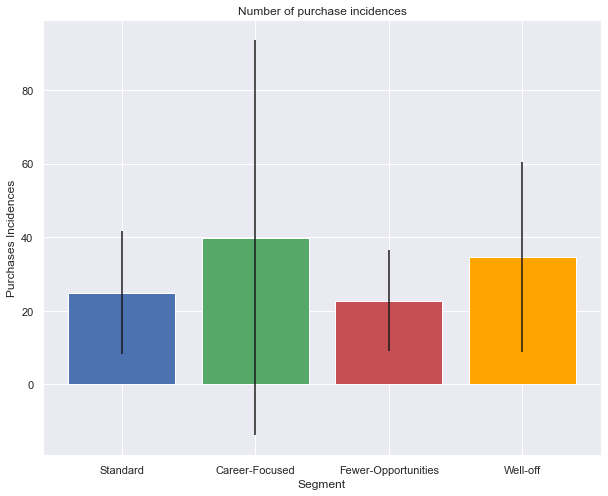

In [27]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

plt.figure(figsize=(10,8))
plt.bar(x = (0,1,2,3),
        tick_label = ('Standard', 'Career-Focused','Fewer-Opportunities', 'Well-off'),
        height=segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))

plt.xlabel('Segment')
plt.ylabel('Purchases Incidences')
plt.title('Number of purchase incidences')
plt.show()

We obsere that the "Career-focused" segment buys products more often. But once again we see that the std is quite large.


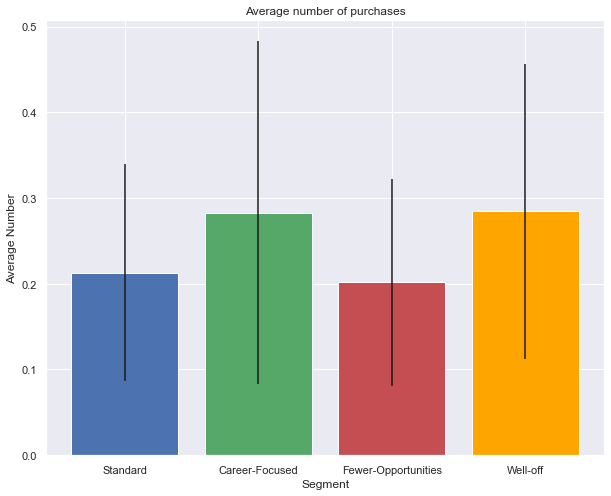

In [29]:
# We can also take a look at the Average number of purchases for each segment.

plt.figure(figsize=(10,8))
plt.bar(x = (0,1,2,3),
        tick_label = ('Standard', 'Career-Focused','Fewer-Opportunities', 'Well-off'),
        height=segments_mean['Average_N_Purchases'],
        yerr = segments_std['Average_N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))

plt.xlabel('Segment')
plt.ylabel('Average Number')
plt.title('Average number of purchases')
plt.show()

## Brand choice

Now, which brand is the customer going to choose?

In [30]:
# Let adjust our dataframe to customers that have bought at least one candy.

df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [31]:
# Let's create some dummy variables for each brand.

brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix='Brand', prefix_sep='_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']

brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [32]:
temp = brand_dummies.groupby(['ID'], as_index=True).mean()

In [33]:
mean_brand_choice = temp.groupby(['Segment'], as_index=True).mean()

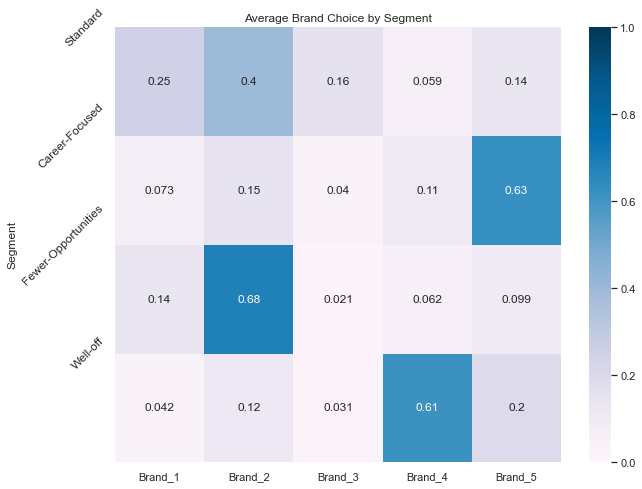

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(mean_brand_choice,
            vmin=0,
            vmax=1,
            cmap='PuBu',
            annot=True)

plt.yticks([0,1,2,3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-off'], rotation = 45, fontsize = 12)
plt.title('Average Brand Choice by Segment')
plt.show() 

The five brands are ranged in ascending order of price - from cheapest to the most expensive.
We can see that the "Fewer-opportunities" segment prefers the cheaper brand 2, while the "Career-focused" segment is dying for a candy from brand 5, the most expensive one.

## Revenue

We'll calculate Revenues for each brand and in total by segment.

In [38]:
# Build revenue from Brand 1
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]

# Create revenue 
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']

segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index =False).sum()
segments_brand_revenue 

c:\Users\ml258\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [41]:
# Build revenue from brand 2
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index =False).sum()


# Build revenue from brand 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index =False).sum()

# Build revenue from brand 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index =False).sum()

# Build revenue from brand 5
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index =False).sum()

segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2611.19,4768.52,3909.17,861.38,2439.75
1,1,736.09,1746.42,664.75,2363.84,19441.06
2,2,2258.90,13955.14,716.25,1629.31,2230.50
3,3,699.47,1298.23,731.35,14185.57,5509.69


In [43]:
# Let's create a total revenue as well.

segments_brand_revenue['Total Revenue'] = (
    segments_brand_revenue['Revenue Brand 1'] +
    segments_brand_revenue['Revenue Brand 2'] +
    segments_brand_revenue['Revenue Brand 3'] +
    segments_brand_revenue['Revenue Brand 4'] +
    segments_brand_revenue['Revenue Brand 5']
)

segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [44]:
# Let's also add the segment proportions dataframe

segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({
    0:'Standard',
    1:'Career-Focused',
    2:'Fewer-Opportunities', 
    3:'Well-Off'
})

segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


We can see that Brand 3 has the lowest revenue compared to the other ones. From a marketing point of view, lowering the price a bit of Brand 4, the standard segment could pivot towards it.

The customers from Brand 4 seems to exclusivly coming form the "Well-off" segment. The segment seems to be loyal, and not really effected by price. Brand 4 could try to cautiously increasing its price. The hypotethis here is that they will likely retain most of its customers and increase their revenue per sale.